In [7]:
import os
import datetime
import json
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
plt.rcParams['figure.figsize'] = [20, 15]
import numpy as np

In [8]:
def show_result_distance(distance, test_accuracy, title="Probe Rotation"):
    """
    This method plots the end result for the main_distance script.
    """
    # Adds the 25% accuracy line
    guessing = np.full((1000, 1), 25)

    # Set the grid
    max_distance = np.max(distance)
    fig, ax = plt.subplots()
    plt.ylim([0, 103])
    plt.xlim([0, max_distance + 1])

    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_major_locator(MultipleLocator(10))

    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    ax.grid(which='major', color='#CCCCCC')
    ax.grid(which='minor', color='#CCCCCC')
    
    print(distance, test_accuracy)
    average_test_acc = np.mean(test_accuracy, axis=1)
    ax.plot(distance, average_test_acc, "--", color="gray", label="avg. test accuracy")
    
    distance = np.repeat(distance.reshape((len(distance), 1)), test_accuracy.shape[1], axis=1)
    ax.plot(distance.flatten(), test_accuracy.flatten() , label="Test Accuracy", marker='+', markersize=20, linestyle="")
    
    ax.plot(guessing, 'r')
    ax.legend()
    plt.ylabel("Accuracy in %")
    plt.xlabel("Rotation in °")
    plt.title(title)
    plt.savefig("tmptmp.svg")
    plt.show()
    
    
def convert_data(dictonary):
    test_accuracy = np.array(list(dictonary.values())) * 100
    distances_from_keys = list(dictonary.keys())
    distances_from_keys = [float(re.findall("\d+", i)[0]) for i in distances_from_keys]
    
    return np.array(distances_from_keys), test_accuracy

    

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170.] [[90.3036974  89.67829089 90.80402261]
 [97.5233902  97.45334467 97.47836093]
 [99.22449592 99.04437885 99.08940812]
 [98.36893981 98.0987642  98.17381298]
 [98.30389753 98.13378696 98.07875119]
 [98.03872517 98.05873818 98.21884225]
 [98.22884875 98.16380647 98.36893981]
 [97.42832841 97.54340321 97.02806824]
 [95.32696253 95.33196578 95.11682594]
 [91.17426327 90.73898034 90.91409416]
 [82.79381598 82.2484615  82.76879972]
 [77.71051183 77.31525492 77.5053785 ]
 [77.25521589 76.92500125 77.0350728 ]
 [69.58022715 69.50517837 69.33506779]
 [76.9300045  76.28958823 77.27022565]
 [84.84014609 85.12032821 85.53059489]
 [88.7576925  90.08855756 90.18361935]
 [82.03332166 81.70310702 81.68809726]]


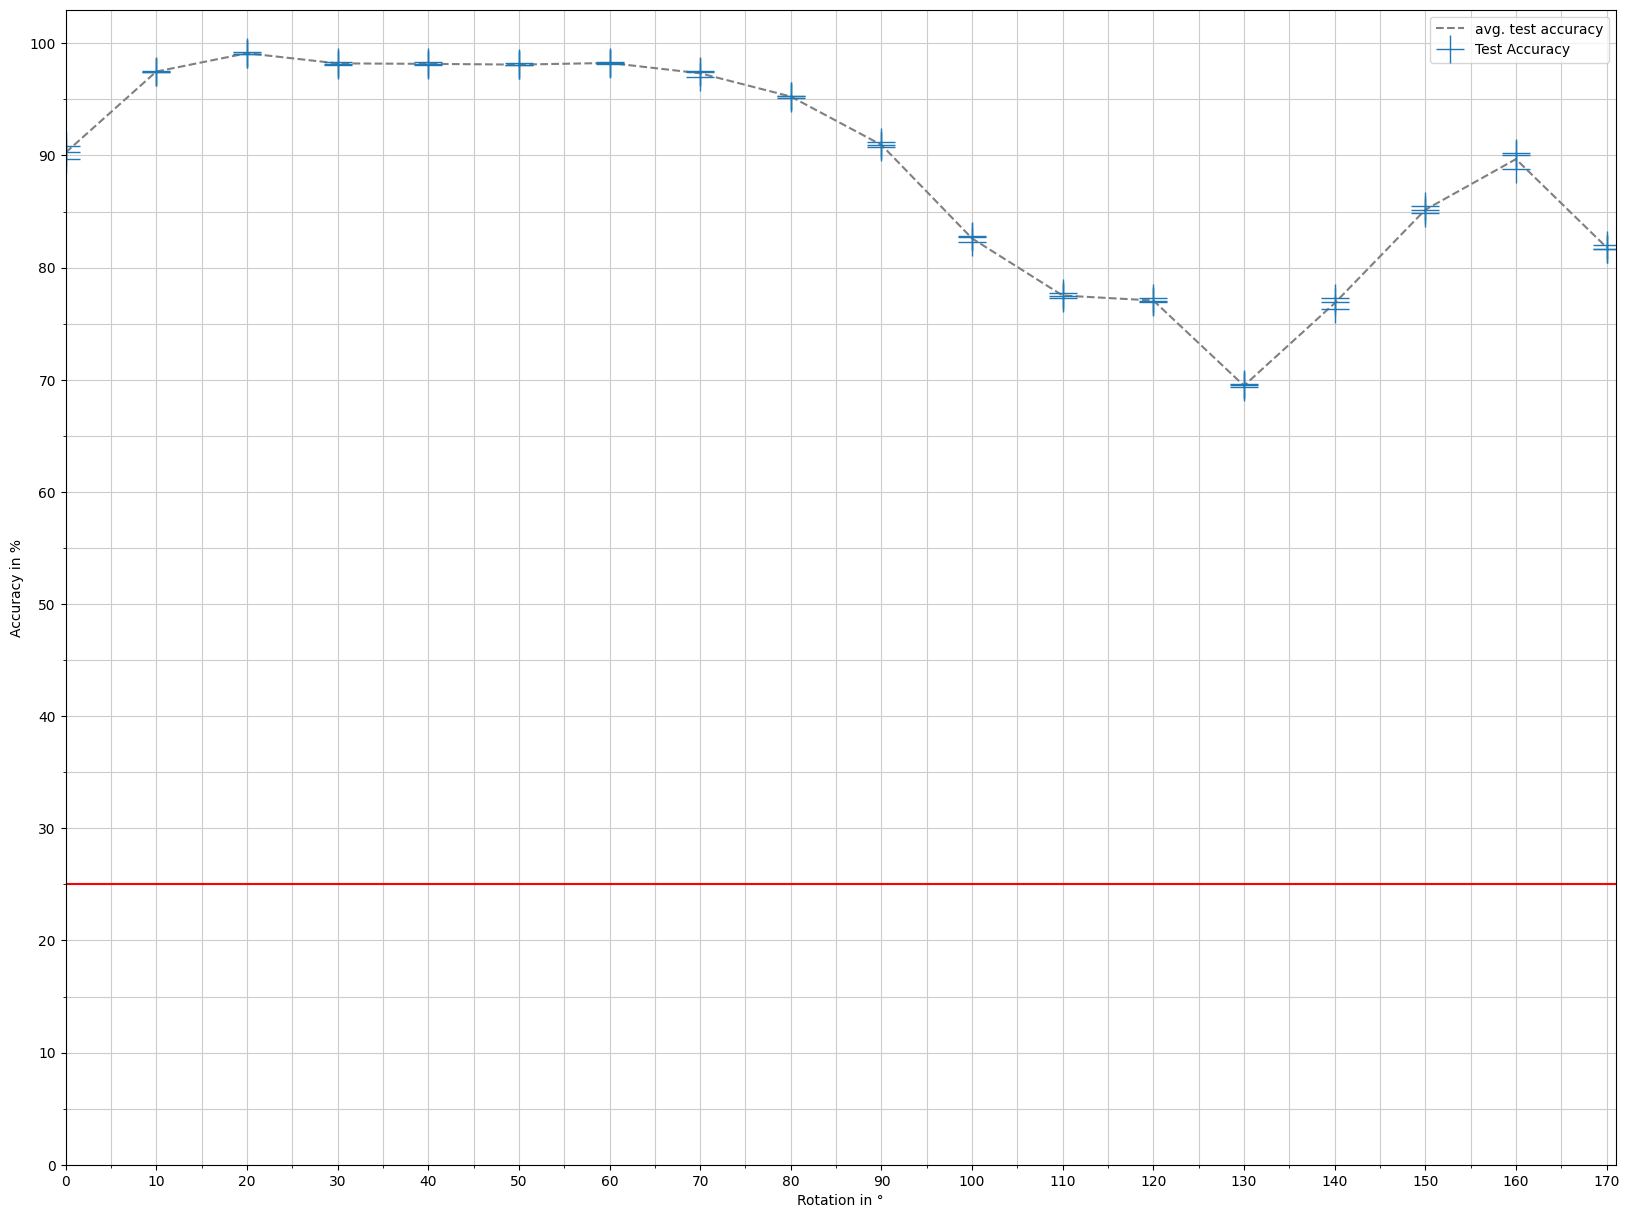

In [9]:
path =  os.path.join("result_files")

with open(os.path.join(path, "result_TEMPEST_20220706-1718.json"), 'r') as file:
    dict_accuracies = json.load(file)["test_accuracies"]
    
with open(os.path.join(path, "result_TEMPEST_20220706-2004.json"), 'r') as file:
    dict_accuracies.update(json.load(file)["test_accuracies"])
    
show_result_distance(*convert_data(dict_accuracies), title="")